In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits

In [4]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/scratch/gpfs/jiaxuanl/Data/')

'/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [86]:
lsbg_cat = Table.read('./Catalog/Greco_S18A_lsbg.fits')
print('Total LSBGs:', len(lsbg_cat))

Total LSBGs: 86002


In [87]:
ra_cen = 348 #354. # 350
dec_cen = 0.5
half_size_y = np.sqrt(4)
half_size_x = np.sqrt(4) / 2 * np.cos(np.deg2rad(dec_cen))

flag = (lsbg_cat['ra'] < ra_cen + half_size_x) & (
    lsbg_cat['ra'] > ra_cen - half_size_x) & (
    lsbg_cat['dec'] < dec_cen + half_size_y) & (
    lsbg_cat['dec'] > dec_cen - half_size_y)
lsbg_cat_cuts = lsbg_cat[flag]

ra_cen = 346 #354. # 350
dec_cen = 0.5
half_size_y = np.sqrt(4)
half_size_x = np.sqrt(4) / 2 * np.cos(np.deg2rad(dec_cen))
flag = (lsbg_cat['ra'] < ra_cen + half_size_x) & (
    lsbg_cat['ra'] > ra_cen - half_size_x) & (
    lsbg_cat['dec'] < dec_cen + half_size_y) & (
    lsbg_cat['dec'] > dec_cen - half_size_y)
lsbg_cat_cuts = vstack([lsbg_cat_cuts, lsbg_cat[flag]])

print('# of LSBGs in random field:', len(lsbg_cat_cuts))
lsbg_cat_cuts.write('./Catalog/random_field/lsbg_random_field3.fits', overwrite=True)

# of LSBGs in random field: 1775


In [88]:
_temp = vstack([Table.read('./Catalog/random_field/lsbg_random_field1.fits'), 
                Table.read('./Catalog/random_field/lsbg_random_field2.fits')])

(-5.0, 5.0)

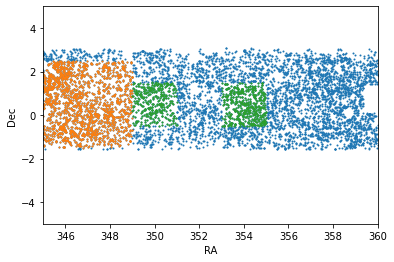

In [89]:
plt.scatter(lsbg_cat['ra'], lsbg_cat['dec'], s=1)
plt.scatter(lsbg_cat_cuts['ra'], lsbg_cat_cuts['dec'], s=1)
plt.scatter(_temp['ra'], _temp['dec'], s=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.xlim(345, 360)
plt.ylim(-5, 5)

In [90]:
lsbg_cat = Table.read('./Catalog/random_field/lsbg_random_field3.fits') # This contains both candy+galaxy and junks

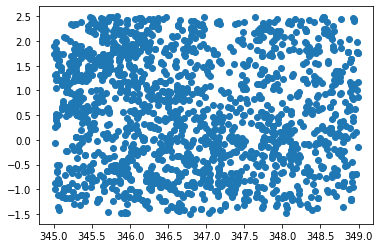

In [69]:
plt.scatter(lsbg_cat['ra'], lsbg_cat['dec'])

In [93]:
Table.read('./Catalog/random_field3/random_field3_cutout_cat_random_field3.fits')['image_flag']

True .. True
True .. True
True .. True
True .. True
True .. True
True .. True
True .. True
True .. True
True .. True
True .. True
True .. True


### Generate cutout

Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/random_field/lsbg_cutout_random_field.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/random_fieldx/xxxx`